# Example of genre predictor results with unseen artist data

In [1]:
# importing necessary pieces from main file, along with data viz components 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from main import get_discography, predictor, training_data, genres
import setup

Quick exploratory piece, is there enough variance in audio feature attributes from each genre grouping?

Quick boxplots show that there seems to be enough variance between groups to allow for classification to work

rock


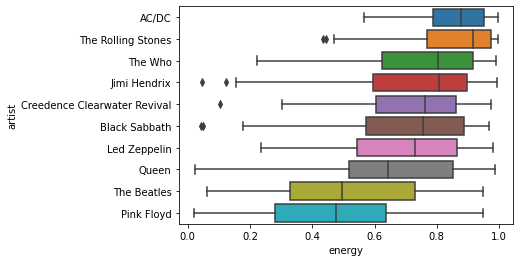

jazz


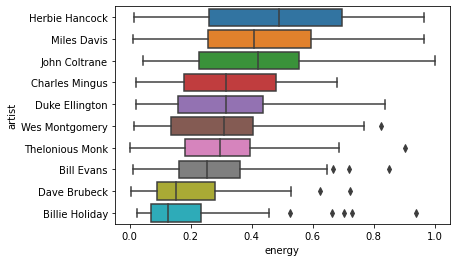

blues


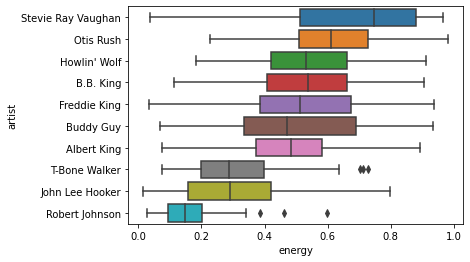

hip hop


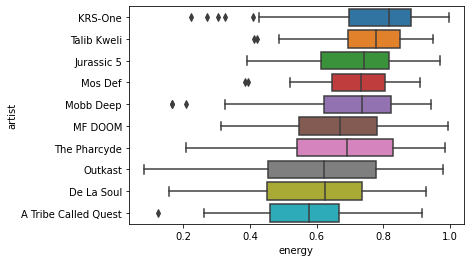

downtempo


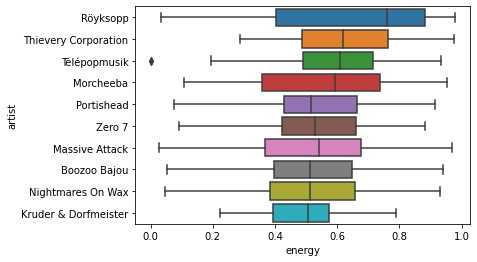

rock


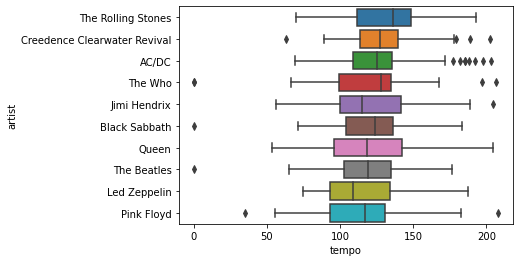

jazz


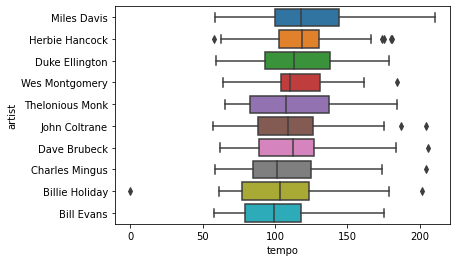

blues


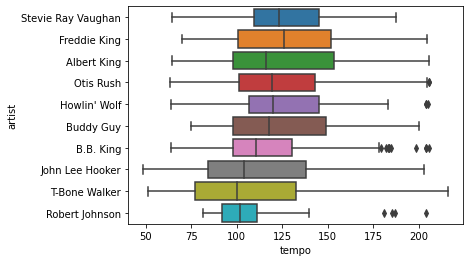

hip hop


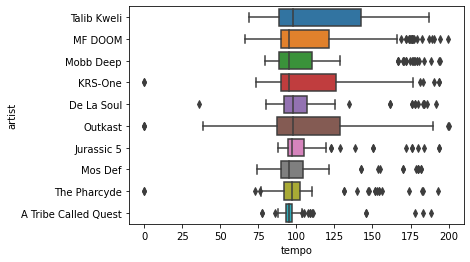

downtempo


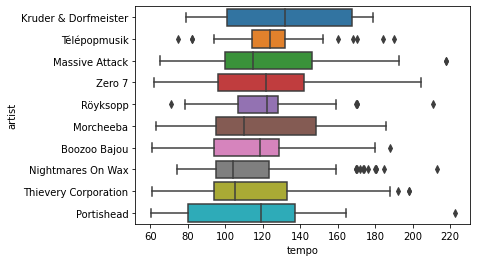

In [2]:
def attribute_boxplt(attribute):
    x = attribute
    
    for key in genres:
        print(genres[key])
        df = training_data[training_data['genre'] == genres[key]]
        ranks = df.groupby('artist')[x].mean().sort_values(ascending=False).index
        sns.boxplot(data=df, x=x, y='artist', orient='h', order=ranks)
        plt.show()

attribute_boxplt('energy')
attribute_boxplt('tempo')

Testing through new artists shows that decision trees are the most reliable classification model

In [3]:
artists = [('joan jett', 0),
            ('chet baker', 1),
            ('blind willie johnson', 2),
            ('hieroglyphics', 3),
            ('lemon jelly', 4),
            ('nirvana', 0),
            ('lauryn hill', 3),
            ('sonny rollins', 1)]

predictor(artists, 'knn')
print('\n')
predictor(artists, 'lr')
print('\n')
predictor(artists, 'rfr')
print('\n')
predictor(artists, 'xgb')
print('\n')
predictor(artists, 'nn')

Model Type: K-Neighbors Classifier
------------------------------
                            actual genre predicted genre percent
Joan Jett & The Blackhearts         rock            rock    0.68
Chet Baker                          jazz            jazz    0.57
Blind Willie Johnson               blues            jazz    0.42
Hieroglyphics                    hip hop         hip hop    0.84
Lemon Jelly                    downtempo            rock    0.56
Nirvana                             rock            rock    0.61
Ms. Lauryn Hill                  hip hop            jazz    0.37
Sonny Rollins                       jazz            jazz    0.38


Model Type: Logistic Regression
------------------------------
                            actual genre predicted genre percent
Joan Jett & The Blackhearts         rock            rock    0.64
Chet Baker                          jazz            jazz    0.68
Blind Willie Johnson               blues           blues    0.77
Hieroglyphics           